In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_5978/2451341646.py:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
# # for gauss:
# n_points = list(range(1, 21))
# eps_list = [0.0, 0.2, 0.5, 0.7, 0.9, 1.0, 2.0]
# num_repetition = 100

# adv_test_loss = np.zeros([len(eps_list), len(n_points), num_repetition], dtype=np.float64)

# for i in range(len(eps_list)):
#     if i == 3:
#         continue
#     arr = np.genfromtxt('tmp_{}.csv'.format(i),delimiter=',', skip_header = 1)
#     arr_pruned = arr[:,1:]
#     adv_test_loss[i] = arr_pruned

adv_test_loss_tmp = np.genfromtxt('tmp_3.csv',delimiter=',', skip_header = 1)[:,2:]
adv_test_loss_tmp.shape
#adv_test_loss_tmp[:,0]


(9, 99)

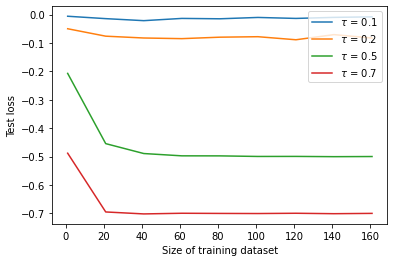

In [2]:
x = np.linspace(1,161,9)
adv_test_loss = np.zeros([4,9,99])
for i in range(4):
    arr = np.genfromtxt('tmp_{}.csv'.format(i),delimiter=',', skip_header = 1)
    arr_pruned = arr[:,2:]
    adv_test_loss[i] = arr_pruned
    
eps_list = [0.1, 0.2, 0.5, 0.7]
test_eps = np.zeros(9)
for idx, eps in enumerate(eps_list):
    test_eps = np.mean(adv_test_loss[idx], axis=1)
    plt.plot(x, test_eps,label="$\u03C4$ = {}".format(eps))
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')
plt.savefig('Class_loss_bern.pdf')

In [ ]:
x=n_points

for eps_idx in range(len(eps_list)):
  if eps_idx == 3:
    x_n = list(range(1,21,2))  
    test_eps_n = np.zeros(len(x_n))    
    for n in x_n:
        n = int(n)
        test_eps_n[(n-1)//2] = np.mean(adv_test_loss_tmp[(n-1)//2,:])
    ysmoothed = gaussian_filter1d(test_eps, sigma=2)
    plt.plot(x, ysmoothed,label="$\epsilon$ = 0.7")
    continue
  eps = eps_list[eps_idx]
  test_eps=np.zeros(len(x))
  
  for n in n_points:
    n=int(n)
    test_eps[n-1]=np.mean(adv_test_loss[eps_idx,n-1,1:])
    
  #plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))
  ysmoothed = gaussian_filter1d(test_eps, sigma=2)
  plt.plot(x, ysmoothed,label="$\epsilon$ = {}".format(eps))
  

plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.savefig('Class_loss_gauss_filter2.pdf')
#files.download('Class_loss_gauss_filter2.pdf')
plt.show()

In [ ]:
x=n_points
for eps_idx in range(len(eps_list)):
  if eps_idx == 3:
    x_n = list(range(1,21,2))  
    test_eps_n = np.zeros(len(x_n))    
    for n in x_n:
        n = int(n)
        test_eps_n[(n-1)//2] = np.mean(adv_test_loss_tmp[(n-1)//2,:]) - np.mean(adv_test_loss[0,n-1,1:])
    ysmoothed = gaussian_filter1d(test_eps, sigma=2)
    plt.plot(x, ysmoothed,label="$\epsilon$ = 0.7")
    continue
  eps = eps_list[eps_idx]
  test_eps=np.zeros(len(x))
  
  for n in n_points:
    n=int(n)
    test_eps[n-1]=np.mean(adv_test_loss[eps_idx,n-1,1:]) - np.mean(adv_test_loss[0,n-1,1:])
    
  #plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))
  ysmoothed = gaussian_filter1d(test_eps, sigma=2)
  plt.plot(x, ysmoothed,label="$\epsilon$ = {}".format(eps))
  

plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.savefig('Class_loss_gauss_filter2.pdf')
#files.download('Class_loss_gauss_filter2.pdf')
plt.show()

In [ ]:
x=n_points

for n in range(10):
    n=int(n)
    test_eps[n-1]=np.mean(adv_test_loss_tmp[n-1,1:])
    
plt.plot(x, test_eps,label="$\epsilon$ = {}".format(eps))   
plt.legend(loc='upper right')
plt.xlabel('Size of training dataset')
plt.ylabel('Test loss')

plt.show()